# Example usage of NRHybSur3dq8T model, a tidally spliced surrogate model

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline

import gwsurrogate

cannot import LAL


/home/balzani57/Repo/GitRepos/Codes/gwtools/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/balzani57/Repo/GitRepos/Codes/gwtools/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")
/home/balzani57/pool/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


## Download surrogate data, this only needs to be done once


In [2]:
# The tidal spliced model uses this surrogate as the base
# This can take a few minutes
gwsurrogate.catalog.pull('NRHybSur3dq8')

'/home/kbarkett/Caltech/gwsurrogate/gwsurrogate/surrogate_downloadsNRHybSur3dq8.h5'

## Load the surrogate, only needs to be done once at start of script

In [2]:
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8Tidal')

Loaded NRHybSur3dq8Tidal model


## Read the documentation

In [3]:
help(sur)

Help on NRHybSur3dq8Tidal in module gwsurrogate.surrogate object:

class NRHybSur3dq8Tidal(SurrogateEvaluator)
 |  A class for the NRHybSur3dq8 surrogate model presented in Varma et al. 2018,
 |  arxiv:1812.07865, augmented with the tidal splicing techniques presented in
 |  Barkett et al., in prep, to generated inspiralling waveforms corresponding to
 |  binary neutron stars/black hole-neutron star systems.
 |  
 |  Evaluates gravitational waveforms generated by aligned-spin binary black hole
 |  systems. This model was built using numerical relativity (NR) waveforms that
 |  have been hybridized using post-Newtonian (PN) and effective one body (EOB)
 |  waveforms. Analytic PN tidal expressions are then utilized to modify the
 |  orbital evolution and waveform modes.
 |  
 |  This model includes the following spin-weighted spherical harmonic modes:
 |  (2,2), (2,1), (2,0), (3,3), (3,2), (3,1), (3,0), (4,4) (4,3), (4,2) and (5,5).
 |  The m<0 modes are deduced from the m>0 modes.
 |  


## Evaluate Waveform

### Evaluate waveform modes in dimensionless units (default)

In [3]:
q = 1.9
chi1z = [0,0,0.2]
chi2z = [0,0,-0.15]
lambda1 = 600
lambda2 = 2000
tidOpts = {'Lambda1': lambda1, 'Lambda2': lambda2}
dt = 0.25        # step size, Units of M
f_low = 3e-3    # initial frequency, Units of cycles/M
t, h, dyn = sur(q, chi1z, chi2z, dt=dt, f_low=f_low, tidal_opts=tidOpts)

In [4]:
# Let's see all available modes (m<0 modes will be included automatically if inclination/phi_ref arguments are given)
print( sorted(h.keys()) )

[(2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4), (5, 5)]


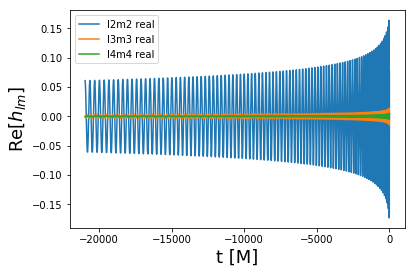

In [5]:
P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.plot(t, h[(4,4)].real, label='l4m4 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

### Evaluate waveform on fixed time array

In [11]:
q = 1.9
chi1z = [0,0,0.2]
chi2z = [0,0,-0.15]
lambda1 = 600
lambda2 = 2000
tidOpts = {'Lambda1': lambda1, 'Lambda2': lambda2}
f_low = 0.0# this will be ignored and the wavefrom will be returned on the times given below
times = np.arange(-10000,-500,0.1)
t, h, dyn = sur(q, chi1z, chi2z, times=times, dt=None, f_low=f_low, tidal_opts=tidOpts)

P.plot(times, h[(2,2)].real, label='l2m2 real')
P.plot(times, h[(3,3)].real, label='l3m3 real')
P.plot(times, h[(4,4)].real, label='l4m4 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [M]', fontsize=18)
P.legend()

ValueError: The option of setting 'fM_low' to 0 is turned off for this model; must specifiy a non-zero 'fM_low'

### Evaluate modes in physical units

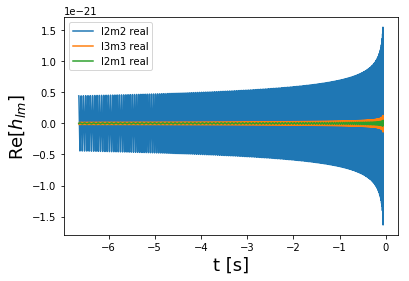

In [8]:
q = 1.9
chi1z = [0,0,0.2]
chi2z = [0,0,-0.15]
lambda1 = 600
lambda2 = 2000
tidOpts = {'Lambda1': lambda1, 'Lambda2': lambda2}
M = 20             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
f_low = 20         # initial frequency in Hz
t, h, dyn = sur(q, chi1z, chi2z, dt=dt, f_low=f_low, mode_list=[(2,2), (2,1), (3, 3)], M=M,
                dist_mpc=dist_mpc, units='mks', tidal_opts=tidOpts)

P.plot(t, h[(2,2)].real, label='l2m2 real')
P.plot(t, h[(3,3)].real, label='l3m3 real')
P.plot(t, h[(2,1)].real, label='l2m1 real')
P.ylabel('Re[$h_{lm}$]', fontsize=18)
P.xlabel('t [s]', fontsize=18)
P.legend()

### Evaluate waveform at a point on sky

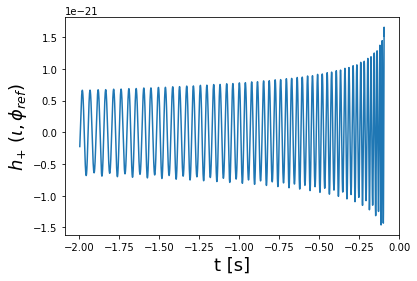

In [10]:
q = 1.9
chi1z = [0,0,0.2]
chi2z = [0,0,-0.15]
lambda1 = 600
lambda2 = 2000
tidOpts = {'Lambda1': lambda1, 'Lambda2': lambda2}
M = 40             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
f_low = 20         # initial frequency in Hz
inclination = np.pi/4
phi_ref = np.pi/5

# Will only include modes given in mode_list argument as well as the m<0 counterparts.
# If mode_list is not specified, uses all available modes.
# Returns h_+ -i h_x
t, h, dyn = sur(q, chi1z, chi2z, dt=dt, f_low=f_low, mode_list=[(2,2), (2,1), (3, 3)], M=M, dist_mpc=dist_mpc, 
           inclination=inclination, phi_ref=phi_ref, units='mks', tidal_opts=tidOpts)

P.plot(t, h.real)
P.ylabel('$h_{+}$ $(\iota, \phi_{ref})$', fontsize=18)
P.xlabel('t [s]', fontsize=18)